In [3]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [4]:
!head gdrive/MyDrive/ua.test

1	20	4	887431883
1	33	4	878542699
1	61	4	878542420
1	117	3	874965739
1	155	2	878542201
1	160	4	875072547
1	171	5	889751711
1	189	3	888732928
1	202	5	875072442
1	265	4	878542441


In [6]:
import torch
import pandas as pd
import matplotlib.pyplot as plt
import torch.nn.functional as F

train = pd.read_csv("/content/gdrive/MyDrive/ua.base", sep ="\t", names = ['user', 'movie','rating', 'timestamp'])
test = pd.read_csv("/content/gdrive/MyDrive/ua.test", sep = "\t", names = ['user', 'movie','rating', 'timestamp'])

items = torch.tensor(train['movie'], dtype = torch.long)
users = torch.tensor(train['user'], dtype = torch.long)
ratings = torch.tensor(train['rating'], dtype = torch.float)

items_test = torch.tensor(test['movie'], dtype = torch.long )
users_test = torch.tensor(test['user'], dtype = torch.long)
ratings_test = torch.tensor(test['rating'], dtype = torch.float)

items_test

tensor([  20,   33,   61,  ...,  570,  808, 1067])

In [7]:
rank = 10

numUsers = users.max() + 1
numItems = items.max() + 1

P = torch.randn(numItems, rank, requires_grad=True)
Q = torch.randn(numUsers, rank, requires_grad=True)  

P.shape, Q.shape

print(P.shape)
print(Q.shape)

torch.Size([1683, 10])
torch.Size([944, 10])


In [8]:
# 10번 user가 20번 영화에 몇 점을 주었을지 예측
(P[20]* Q[20]).sum()

tensor(1.8562, grad_fn=<SumBackward0>)

In [9]:
P = torch.randn(numItems, rank, requires_grad=True)
Q = torch.randn(numUsers, rank, requires_grad=True)

optim = torch.optim.Adam([P,Q], lr = 0.1)

X = []
Y = []
Y_test = []

for epoch in range(1001):
  h = (P[items] * Q[users]).sum(dim = 1)
  cost = F.mse_loss(h, ratings)

  optim.zero_grad()
  cost.backward()
  optim.step()

  
  with torch.no_grad():

    X.append(epoch)
    Y.append(cost.item())

    h_test = (P[items_test] * Q[users_test]).sum(dim=1)
    cost_test = F.mse_loss(h_test, ratings_test)

    Y_test.append(cost_test.item())

    if epoch % 100 == 0:
      print(f"epoch: {epoch}, cost: {cost.item()}")

epoch: 0, cost: 23.419628143310547
epoch: 100, cost: 0.5653654336929321
epoch: 200, cost: 0.49160489439964294
epoch: 300, cost: 0.46870267391204834
epoch: 400, cost: 0.4584026336669922
epoch: 500, cost: 0.4527489244937897
epoch: 600, cost: 0.44914939999580383
epoch: 700, cost: 0.44668859243392944
epoch: 800, cost: 0.4448491930961609
epoch: 900, cost: 0.44333815574645996
epoch: 1000, cost: 0.4419962763786316


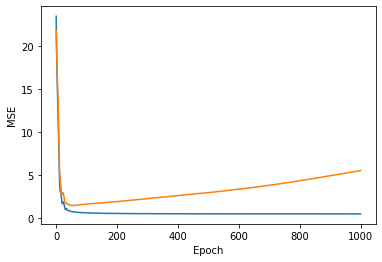

In [10]:
plt.ylabel("MSE")
plt.xlabel("Epoch")

plt.plot(X, Y, label="Train MSE")
plt.plot(X,Y_test, label="Test MSE")

plt.show()

epoch: 0, cost: 23.75006675720215
epoch: 100, cost: 0.6745423078536987
epoch: 200, cost: 0.6128673553466797
epoch: 300, cost: 0.5964124202728271
epoch: 400, cost: 0.5907335877418518
epoch: 500, cost: 0.5890467166900635
epoch: 600, cost: 0.5884416699409485
epoch: 700, cost: 0.5880651473999023
epoch: 800, cost: 0.5877575874328613
epoch: 900, cost: 0.5875309109687805
epoch: 1000, cost: 0.5873871445655823


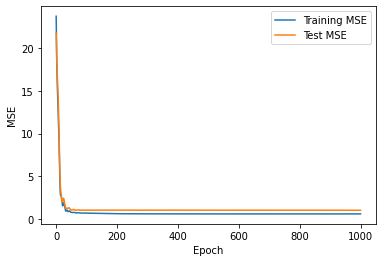

In [11]:
P = torch.randn(numItems, rank, requires_grad=True)
Q = torch.randn(numUsers, rank, requires_grad=True)

lambda1 = 1
lambda2 = 1


optim = torch.optim.Adam([P,Q], lr = 0.1)

X = []
Y = []
Y_test = []

for epoch in range(1001):
  h = (P[items] * Q[users]).sum(dim = 1)
  cost = F.mse_loss(h, ratings)

  loss = cost + lambda1 * (P*P).mean() + lambda2 * (Q*Q).mean()

  optim.zero_grad()
  loss.backward()
  optim.step()

  with torch.no_grad():

    X.append(epoch)
    Y.append(cost.item())

    h_test = (P[items_test] * Q[users_test]).sum(dim=1)
    cost_test = F.mse_loss(h_test, ratings_test)

    Y_test.append(cost_test.item())

    if epoch % 100 == 0:
      print(f"epoch: {epoch}, cost: {cost.item()}")

plt.ylabel("MSE")
plt.xlabel("Epoch")

plt.plot(X, Y, label="Training MSE")
plt.plot(X, Y_test, label="Test MSE")

plt.legend()
plt.show()

epoch: 0, cost: 12.883711814880371, test: 10.024322509765625
epoch: 100, cost: 0.6035928130149841, test: 0.9184222221374512
epoch: 200, cost: 0.5771156549453735, test: 0.9033694863319397
epoch: 300, cost: 0.5731791853904724, test: 0.9075759649276733
epoch: 400, cost: 0.5722533464431763, test: 0.9097028970718384
epoch: 500, cost: 0.5718255043029785, test: 0.9098589420318604
epoch: 600, cost: 0.5714981555938721, test: 0.9095349907875061
epoch: 700, cost: 0.5712812542915344, test: 0.9091300964355469
epoch: 800, cost: 0.571145236492157, test: 0.9084206819534302
epoch: 900, cost: 0.5710276961326599, test: 0.9069774746894836
epoch: 1000, cost: 0.5708578824996948, test: 0.9056040048599243


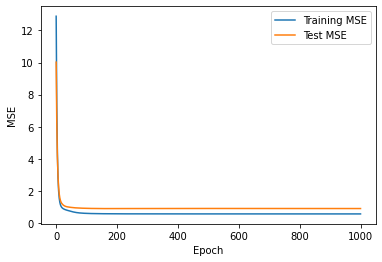

In [13]:
P = torch.randn(numItems, rank, requires_grad=True)
Q = torch.randn(numUsers, rank, requires_grad=True)

bias_item = torch.randn(numItems, requires_grad = True)
bias_user = torch.randn(numUsers, requires_grad = True)
mean = ratings.mean()

lambda3 = 1
lambda4 = 1

optim = torch.optim.Adam([P, Q, bias_item, bias_user], lr= 0.1)

X = []
Y = []
Y_test = []

for epoch in range(1001):

  h = (P[items]*Q[users]).sum(dim=1) + mean + bias_item[items] + bias_user[users]
  cost = F.mse_loss(h, ratings)
  loss = cost + lambda1 * (P*P).mean() + lambda2 * (Q*Q).mean() + \
         lambda3 * (bias_user ** 2).mean() + lambda4 * (bias_item ** 2).mean()


  optim.zero_grad()
  loss.backward()
  optim.step()

  with torch.no_grad():
    X.append(epoch)
    Y.append(cost.item())

    h_test = (P[items_test] * Q[users_test]).sum(dim = 1) + \
            mean + bias_item[items_test] + bias_user[users_test]
    cost_test = F.mse_loss(h_test, ratings_test)

    Y_test.append(cost_test.item())


    if epoch % 100 == 0:
      print(f"epoch: {epoch}, cost: {cost.item()}, test: {cost_test.item()}")

plt.ylabel("MSE")
plt.xlabel("Epoch")

plt.plot(X, Y, label="Training MSE")
plt.plot(X, Y_test, label="Test MSE")

plt.legend()
plt.show()